In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df = df[(df["item"]==1) & (df['store']==1)]

In [ ]:
df.tail()

,date,store,item,sales
1821,2017-12-27,1,1,14
1822,2017-12-28,1,1,19
1823,2017-12-29,1,1,15
1824,2017-12-30,1,1,27
1825,2017-12-31,1,1,23


In [ ]:
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")

In [ ]:
df.tail()

,date,store,item,sales
1821,2017-12-27,1,1,14
1822,2017-12-28,1,1,19
1823,2017-12-29,1,1,15
1824,2017-12-30,1,1,27
1825,2017-12-31,1,1,23


In [ ]:
type(df['date'])

pandas.core.series.Series

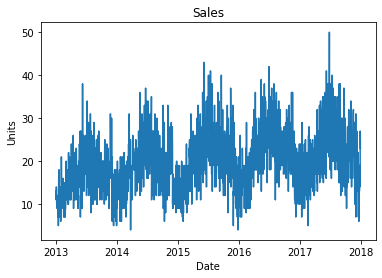

In [ ]:
plt.plot(df['date'],df['sales'])
plt.title('Sales')
plt.xlabel('Date')
plt.ylabel('Units')
plt.show()

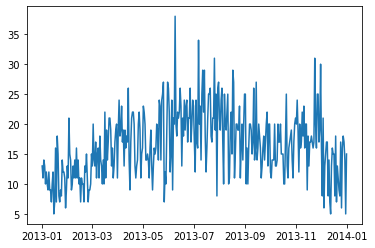

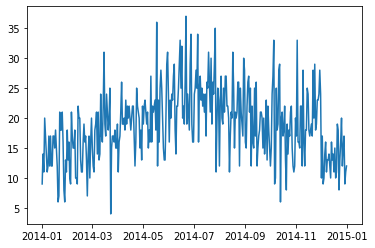

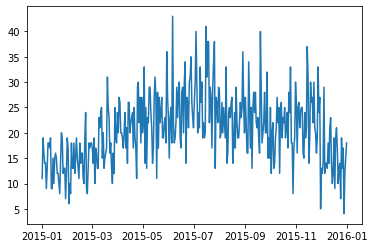

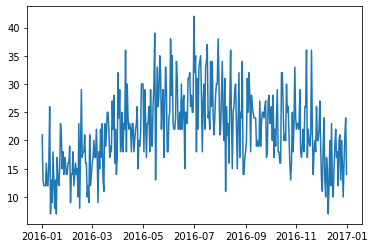

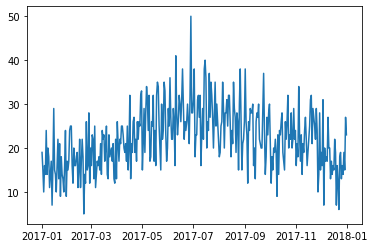

In [ ]:
for y in range(2013, 2018):
  mask = (df['date'].dt.year == int(y))
  temp = df[mask]
  plt.plot(temp['date'], temp['sales'])
  plt.show()

In [ ]:
raw_seq = df['sales']

In [ ]:
raw_seq.head()

0    13
1    11
2    14
3    13
4    10
Name: sales, dtype: int64

In [ ]:
# univariate data preparation
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
  X, y = list(), list()
  for i in range(len(sequence)):
    # find the end of this pattern
    end_ix = i + n_steps
    # check if we are beyond the sequence
    if end_ix > len(sequence)-1:
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return array(X), array(y)

In [ ]:
n_steps = 10
X, y = split_sequence(raw_seq, n_steps)

In [ ]:
for i in range(5):
  print(X[i], y[i])

[13 11 14 13 10 12 10  9 12  9] 9
[11 14 13 10 12 10  9 12  9  9] 7
[14 13 10 12 10  9 12  9  9  7] 10
[13 10 12 10  9 12  9  9  7 10] 12
[10 12 10  9 12  9  9  7 10 12] 5


In [ ]:
print(X, len(y))

10 1816


In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
# define model
model = Sequential()
model.add(Dense(30, activation= 'tanh' , input_dim=n_steps))
model.add(Dense(36, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer= 'adam' , loss= 'mse' )
# fit model
history = model.fit(X, y, batch_size=120, epochs=2000, verbose=0)


Epoch 1/2000
16/16 - 0s - loss: 26.2144
Epoch 2/2000
16/16 - 0s - loss: 25.5571
Epoch 3/2000
16/16 - 0s - loss: 27.1151
Epoch 4/2000
16/16 - 0s - loss: 26.9551
Epoch 5/2000
16/16 - 0s - loss: 26.6582
Epoch 6/2000
16/16 - 0s - loss: 26.1132
Epoch 7/2000
16/16 - 0s - loss: 25.6609
Epoch 8/2000
16/16 - 0s - loss: 25.3551
Epoch 9/2000
16/16 - 0s - loss: 26.0294
Epoch 10/2000
16/16 - 0s - loss: 26.1834
Epoch 11/2000
16/16 - 0s - loss: 25.5531
Epoch 12/2000
16/16 - 0s - loss: 25.2495
Epoch 13/2000
16/16 - 0s - loss: 25.9391
Epoch 14/2000
16/16 - 0s - loss: 26.1250
Epoch 15/2000
16/16 - 0s - loss: 25.6438
Epoch 16/2000
16/16 - 0s - loss: 25.2813
Epoch 17/2000
16/16 - 0s - loss: 25.8258
Epoch 18/2000
16/16 - 0s - loss: 25.8994
Epoch 19/2000
16/16 - 0s - loss: 25.7397
Epoch 20/2000
16/16 - 0s - loss: 25.4085
Epoch 21/2000
16/16 - 0s - loss: 25.1908
Epoch 22/2000
16/16 - 0s - loss: 25.2760
Epoch 23/2000
16/16 - 0s - loss: 25.9018
Epoch 24/2000
16/16 - 0s - loss: 25.6673
Epoch 25/2000
16/16 - 0s 